In [31]:
import xarray as xr
import numpy as np
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

dirpath = '/local/data/soccom/SOCCOM_LoResQC_LIAR_05May2021_netcdf/'
float_names = ['5904183', '5095637', '5094858', '5094860', '5094180', '5094184', '5095372', '5094768', '5094767']

f_4183 = xr.open_dataset(dirpath + '5904183QC.nc')
f_5637 = xr.open_dataset(dirpath + '5905637QC.nc')
f_4858 = xr.open_dataset(dirpath + '5904858QC.nc')
f_4860 = xr.open_dataset(dirpath + '5904860QC.nc')
f_4180 = xr.open_dataset(dirpath + '5904180QC.nc')
f_4184 = xr.open_dataset(dirpath + '5904184QC.nc')
f_5372 = xr.open_dataset(dirpath + '5905372QC.nc')
f_4768 = xr.open_dataset(dirpath + '5904768QC.nc')
f_4767 = xr.open_dataset(dirpath + '5904767QC.nc')

floats = [f_4183, f_5637, f_4858, f_4860, f_4180, f_4184, f_5372, f_4768, f_4767]
data = f_4180
#data = xr.open_dataset('/local/data/soccom/SOCCOM_LoResQC_LIAR_22Dec2020_netcdf/7614SOOCNQC.nc')
data

<xarray.Dataset>
Dimensions:              (NPARAMETER: 36, N_LEVELS: 69, N_PROF: 217)
Dimensions without coordinates: NPARAMETER, N_LEVELS, N_PROF
Data variables: (12/51)
    Cruise               |S11 ...
    Station              (N_PROF) int32 ...
    Lon                  (N_PROF) float64 ...
    Lat                  (N_PROF) float64 ...
    Lat_QF               (N_PROF) |S1 ...
    Lat_QFA              (N_PROF) float64 ...
    ...                   ...
    Type                 |S1 ...
    mon_day_yr           (N_PROF) |S10 ...
    hh_mm                (N_PROF) |S5 ...
    Parameters           (NPARAMETER) |S19 ...
    JULD                 (N_PROF) datetime64[ns] ...
    REFERENCE_DATE_TIME  object ...
Attributes:
    Comments:  \n//0\n//<Encoding>UTF-8</Encoding>\n//File updated on 05/01/2...

<Figure size 5760x720 with 0 Axes>

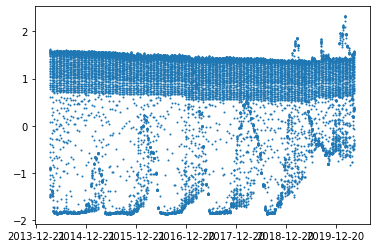

<Figure size 5760x720 with 0 Axes>

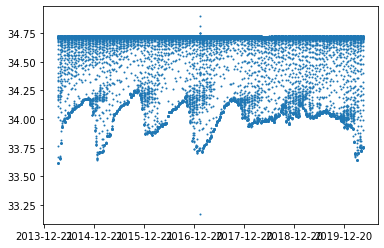

<Figure size 5760x720 with 0 Axes>

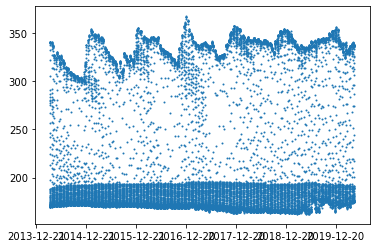

<Figure size 5760x720 with 0 Axes>

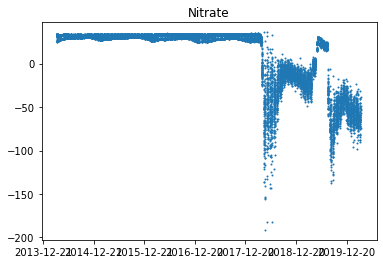

<Figure size 5760x720 with 0 Axes>

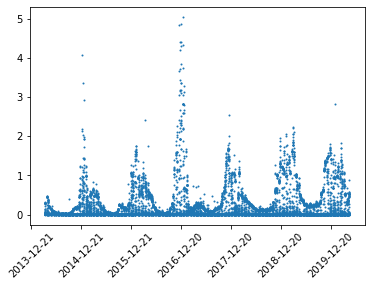

<Figure size 5760x720 with 0 Axes>

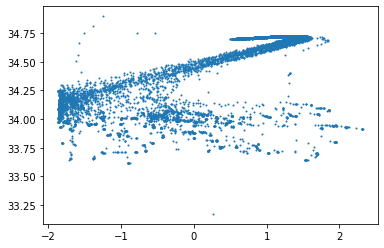

In [32]:
temp = data.Temperature.transpose().values
time = data.JULD.transpose().values

dim = temp.shape
import numpy.matlib

timerep = np.matlib.repmat(time,dim[0],1);

temp=temp.reshape((dim[0]*dim[1], 1), order='F')
time = timerep.reshape((dim[0]*dim[1], 1), order='F')
nanmask=np.isnan(temp)

plt.figure(figsize=(80,10))
tick_spacing = 365
fig, ax = plt.subplots(1,1)
ax.scatter(time, temp, s=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()


sal = data.Salinity.transpose().values
sal=sal.reshape((dim[0]*dim[1], 1), order='F')
plt.figure(figsize=(80,10))
tick_spacing = 365
fig, ax = plt.subplots(1,1)
ax.scatter(time, sal, s=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

o2 = data.Oxygen.transpose().values
o2=o2.reshape((dim[0]*dim[1], 1), order='F')
plt.figure(figsize=(80,10))
tick_spacing = 365
fig, ax = plt.subplots(1,1)
ax.scatter(time, o2, s=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

nitrate = data.Nitrate.transpose().values
nitrate=nitrate.reshape((dim[0]*dim[1], 1), order='F')
plt.figure(figsize=(80,10))
tick_spacing = 365
fig, ax = plt.subplots(1,1)
ax.scatter(time, nitrate, s=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.title('Nitrate')
plt.show()

chl = data.Chl_a.transpose().values
chl=chl.reshape((dim[0]*dim[1], 1), order='F')
plt.figure(figsize=(80,10))
tick_spacing = 365
fig, ax = plt.subplots(1,1)
ax.scatter(time, chl, s=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(80,10))
tick_spacing = 1
fig, ax = plt.subplots(1,1)
ax.scatter(temp, sal, s=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

In [33]:
import numpy as np
np.set_printoptions(threshold=np.inf)

In [34]:
#depth = data.Depth.transpose().values
#depth=depth.reshape((dim[0]*dim[1], 1), order='F')
#plt.figure(figsize=(80,10))
#tick_spacing = 365
#fig, ax = plt.subplots(1,1)
#ax.scatter(time, depth, s=1)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#plt.show()

In [35]:
x = data.JULD
y = data.Depth.values
y = np.nanmean(y, axis=0)

In [36]:
temperature = data.Temperature.transpose().values
temp_qf = data.Temperature_QFA.transpose().values
temp_qf = temp_qf == 0
temperature[~temp_qf] = np.nan

In [37]:
def set_temp_var(fl):
    temp = fl.Temperature.transpose().values
    temp_qf = fl.Temperature_QFA.transpose().values 
    temp_qf = temp_qf == 0
    temp[~temp_qf] = np.nan
    return temp
def set_salinity_var(fl):
    salinity = fl.Salinity.transpose().values
    sal_qf = fl.Salinity_QFA.transpose().values
    sal_qf = sal_qf == 0
    salinity[~sal_qf] = np.nan
    return salinity
def set_nitrate_var(fl):
    nitrate = fl.Nitrate.transpose().values
    nitr_qf = fl.Nitrate_QFA.transpose().values
    nitr_qf = nitr_qf == 0
    nitrate[~nitr_qf] = np.nan
    return nitrate
def set_oxygen_var(fl):
    oxygen = fl.Oxygen.transpose().values
    oxygen_qf = fl.Oxygen_QFA.transpose().values
    oxygen_qf = oxygen_qf == 0
    oxygen[~oxygen_qf] = np.nan
    return oxygen
def set_chl_var(fl):
    chl_a = fl.Chl_a_corr.transpose().values
    chl_a_qf = fl.Chl_a_corr_QFA.transpose().values
    chl_a_qf = chl_a_qf == 0
    chl_a[~chl_a_qf] = np.nan
    return chl_a
def set_POC_var(fl):
    POC = fl.POC.transpose().values
    POC_qf = fl.POC_QFA.transpose().values
    POC_qf = POC_qf == 1
    POC[~POC_qf] = np.nan
    return POC

In [38]:
def set_float_var(fl):
    temp = set_temp_var(fl)
    salinity = set_salinity_var(fl)
    nitrate = set_nitrate_var(fl)
    oxygen = set_oxygen_var(fl)
    chl_a = set_chl_var(fl)
    POC = set_POC_var(fl)
    return temp, salinity, nitrate, oxygen, chl_a, POC

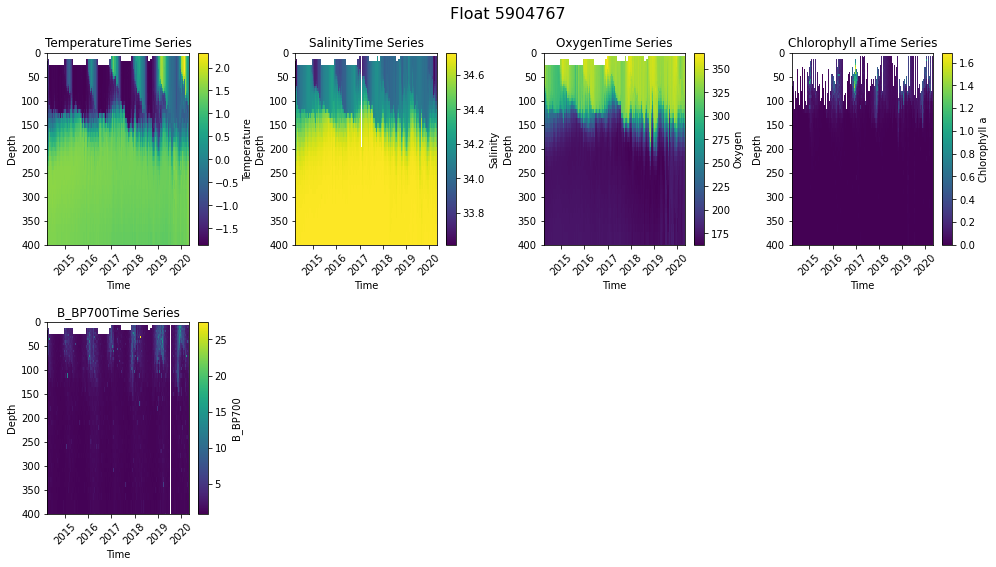

In [39]:

def plot_depth_time(floats):
    for data in floats: 
        temp, salinity, nitrate, oxygen, chl_a, POC = set_float_var(data)
        variables = [temp, salinity, oxygen, chl_a, POC]
        varNames = ['Temperature', 'Salinity', 'Oxygen', 'Chlorophyll a', 'B_BP700']
        plt.figure(figsize=(16, 8)) 
        plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.4)
        
        for ii in range(len(variables)):
            
            plt.subplot(2, 4, ii+1)
            plt.title(varNames[ii] + 'Time Series')
            plt.pcolormesh(x.values, y, variables[ii], shading = 'auto')
            plt.ylim([0, 400])
            plt.gca().invert_yaxis()
            cbar = plt.colorbar()
            plt.xlabel('Time')
            plt.ylabel('Depth')
            cbar.set_label(varNames[ii])
            plt.xticks(rotation = 45)

        plt.suptitle('Float 5904767', fontsize=16)
        #plt.savefig('/home/ac63/projects/hmei/figures/5904767_Time_Series.png')

plot_depth_time([f_4180])

# Single Float Trajectories by Year

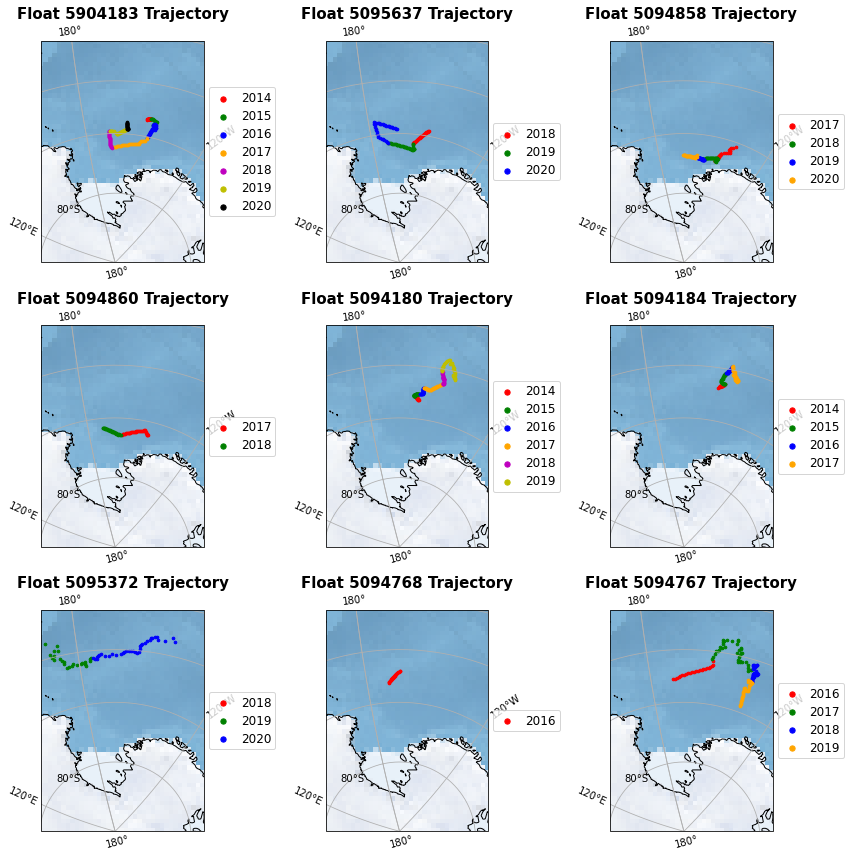

In [183]:
import cartopy.crs as ccrs
import cartopy
import pandas as pd


fig = plt.figure(figsize=(12, 12))

for fl in range(len(floats)):
    lat = floats[fl].Lat.values
    lon = floats[fl].Lon.values
    minlon = min(lon)
    maxlon = max(lon)

    #x is data.JULD
    dates = floats[fl].JULD.values
    dates = pd.to_datetime(dates).year

    yrs = range(min(dates), max(dates))

    clrs=['r','g','b','orange','m','y','k', 'pink'];

    #plt.figure(figsize=(8,8))
    #ax = plt.axes(projection=ccrs.Stereographic(central_longitude = '-165'))
    ax = plt.subplot(3,3, fl+1, projection=ccrs.Stereographic(central_longitude = '-165'))

    ax.stock_img()
    ax.coastlines()
    for i in range(len(yrs)):
        ax.scatter(lon[dates==yrs[i]], lat[dates==yrs[i]], s=7, color = clrs[i], transform=ccrs.PlateCarree(), label=str(yrs[i]))
    #ax.set_extent([minlon - 10, maxlon + 10, -90, -50])
    ax.set_extent([170, 225, -90, -50])
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
    #.set_xticks(ax.get_xticks())
    #ax.set_yticks(ax.get_yticks())
    gridlines = ax.gridlines(draw_labels=True)
    leg = plt.legend(markerscale=2,loc='center left', bbox_to_anchor=(1, 0.5))
    leg_lines = leg.get_lines()
    leg_texts = leg.get_texts()
    plt.setp(leg_lines, linewidth=4)
    plt.setp(leg_texts, fontsize='large')
    plt.title('Float ' + float_names[fl] + ' Trajectory', fontweight='bold', fontsize='15')
    
    
fig.tight_layout()

#plt.show()
plt.savefig('/home/ac63/projects/hmei/figures/Single_Float_Trajectories_ByYear.png')


# Float Trajectories

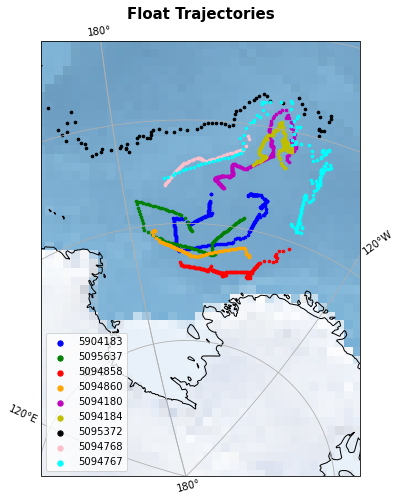

In [167]:

plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.Stereographic(central_longitude = '-165'))
ax.stock_img()
ax.coastlines()
clrs=['b','g','r','orange','m','y','k', 'pink', 'cyan'];

ax.set_extent([170, 225, -90, -50])
ax.set_xlabel('lon')
ax.set_ylabel('lat')
for f in range(len(floats)):
    lat = floats[f].Lat.values
    lon = floats[f].Lon.values
    ax.scatter(lon, lat, transform=ccrs.PlateCarree(), s=7, color=clrs[f], label=float_names[f])
gridlines = ax.gridlines(draw_labels=True)
plt.legend(markerscale=2)

plt.title('Float Trajectories', fontweight = 'bold', fontsize='15')
#plt.savefig('/home/ac63/projects/hmei/figures/Float_Trajectories.png')

Text(0.5, 1.0, '5904183 Mixed Layer Depth Temperature Time Series')

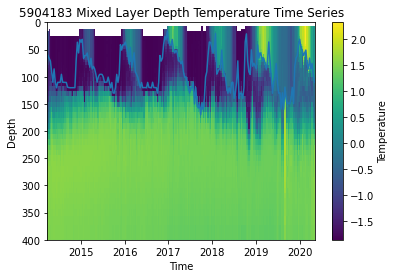

In [42]:


def get_mld_rho(fl):
    density = fl.Sigma_theta.transpose().values
    density = np.flip(density, 0)
    #density=density.reshape(1,(dim[0]*dim[1]), order='F')
    depth = fl.Depth.transpose().values
    depth = np.flip(depth, 0)
    #depth=depth.reshape(1,(dim[0]*dim[1]), order='F')
    rhocrit = 0.02
    density[np.isnan(depth)] = float("nan")
    depth[np.isnan(density)] = float("nan")
    d10 = np.absolute(depth-10)
    dref = np.empty((1, np.size(density, 1)))
    dref[:] = np.NaN
    mld = np.empty((1,np.size(density, 1)))
    mld[:] = np.NaN
    imld = np.empty((1,np.size(density, 1))) 
    imld[:] = np.NaN
    for ii in range(np.size(density,1)):
        idx = (d10[:, ii]==np.nanmin(d10[:,ii], axis=0)).argmax()
        dref[0,ii]=depth[idx,ii]
        if (idx.size != 0):
            drho10 = density[idx, ii]
            drho10 = np.absolute(density[:,ii] - drho10);
            drho10[0:idx] = np.NaN;
            idx = (drho10>=rhocrit).argmax()
            if (idx.size == 0):
                imld[0, ii] = np.NaN
                mld[0, ii] = np.Nan
            else:
                imld[0,ii]=idx;
                mld[0,ii]=depth[idx,ii]
        else:
            imld[0, ii] = np.NaN
            mld[0, ii] = np.Nan
    imld[mld>900]=np.NaN;
    mld[mld>900]=np.NaN;
    imld = imld.flatten()
    mld = mld.flatten()
    end = len(depth)
    depth_cat = np.stack((depth[0:end-1,:],depth[1:end,:]),axis=2);
    dpth_mid=np.nanmean(depth_cat, axis=2)
    depth2 = np.vstack((depth[0,:],dpth_mid,depth[end-1,:]))
    thickn=np.diff(depth2,axis=0);

    return mld, imld, thickn

mld, imld, thickn = get_mld_rho(data)

#dpth_mid=nanmean(cat(3,dpth(1:end-1,:),dpth(2:end,:)),3);
#thickn=diff([dpth(1,:);dpth_mid;dpth(end,:)],[],1);
plt.pcolormesh(x.values, y, temperature, shading = 'auto')
plt.ylim([0, 400])
plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Depth')
cbar.set_label('Temperature')
plt.plot(x.values, mld)
plt.title('5904183 Mixed Layer Depth Temperature Time Series')
#plt.savefig('/home/ac63/projects/hmei/figures/5904183_MLD')


# Plotting Mixed Layer Averages

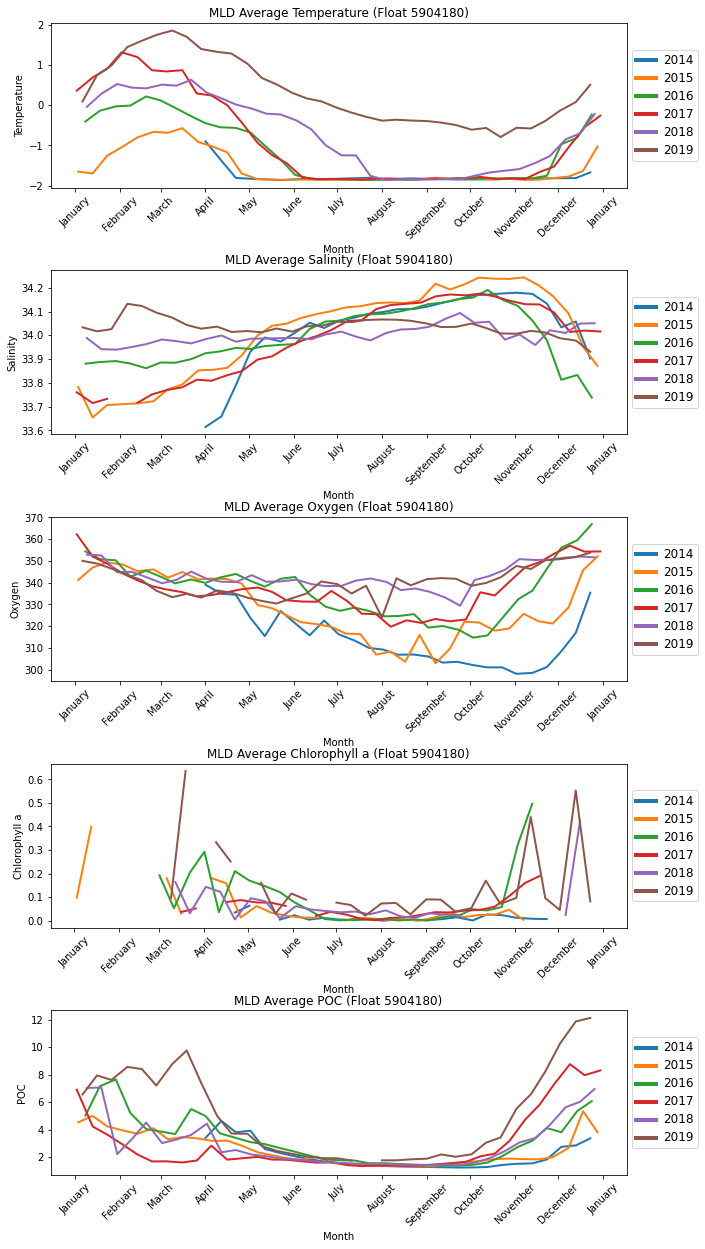

In [43]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

#date_mo = np.datetime_as_string(x.values, unit = 'D')
temp = temperature
temp, salinity, nitrate, oxygen, chl_a, POC = set_float_var(data)
variables = [temp, salinity, oxygen, chl_a, POC]
varNames = ['Temperature', 'Salinity', 'Oxygen', 'Chlorophyll a', 'POC']
def plot_avg_var(variables, varNames):
    fig = plt.figure(figsize=(10, 20))
    for ii in range(0, len(variables)):
        var = np.flip(variables[ii], 0)
        var[var==0] = np.nan

        avg_var = np.empty((1,np.size(var, 1))).flatten()

        for i in range(len(imld)):
            #avg_temp[i] = np.nanmean(temp[0:int(imld[i]),i])
            avg_var[i] = np.nansum(var[0:int(imld[i]),i]*thickn[0:int(imld[i]),i])/np.nansum(thickn[0:int(imld[i]),i])
        avg_var[avg_var==0] = np.nan
        
        dayofyear = data.JULD.dt.dayofyear
        
        ax = fig.add_subplot(5,1,ii + 1)
        for yr in range(len(yrs)):
            plt.plot(dayofyear.values[dates==yrs[yr]], avg_var[dates==yrs[yr]], label = str(yrs[yr]), linewidth=2)

        date_form = DateFormatter("%B") # %m for month number
        ax.xaxis.set_major_formatter(date_form)
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        leg_lines = leg.get_lines()
        leg_texts = leg.get_texts()
        ax.set_xlabel('Month')
        ax.set_ylabel(str(varNames[ii]))
        plt.title('MLD Average ' + str(varNames[ii]) + ' (Float 5904180)')
        plt.setp(leg_lines, linewidth=4)
        plt.setp(leg_texts, fontsize='large')
        plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
        #plt.gcf().autofmt_xdate()
        #plt.show()
        #print(avg_var)
plot_avg_var(variables, varNames)    
plt.show()
#plt.savefig('/home/ac63/projects/hmei/figures/5904767_MLD_Average_Vars')


# MLD Averages, All Floats, By Year

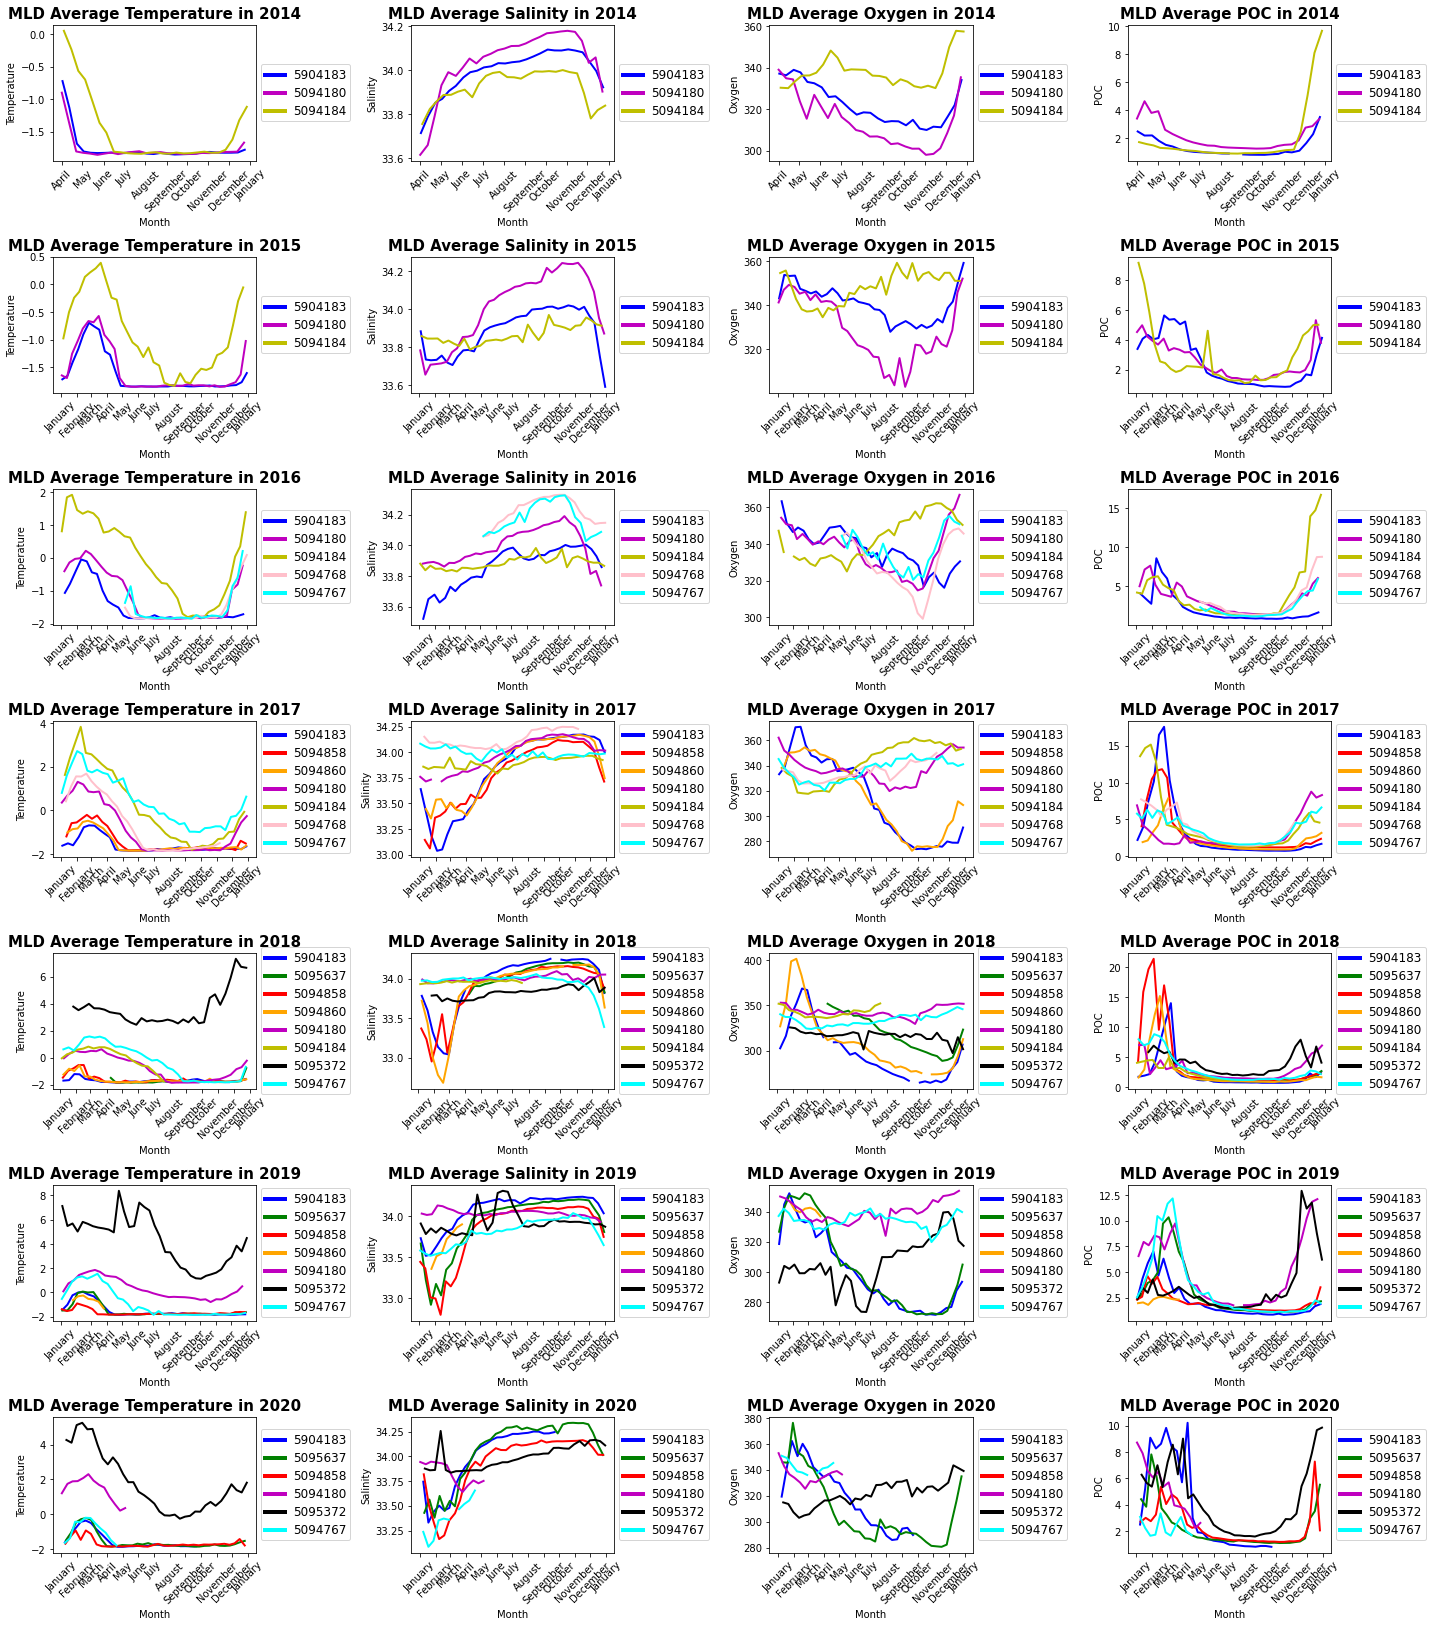

In [147]:
fig = plt.figure(figsize=(20,25))
yrs = range(2014, 2021)
var_functions = [set_temp_var, set_salinity_var, set_oxygen_var, set_POC_var]
variables = [temp, salinity, oxygen, POC]
varNames = ['Temperature', 'Salinity', 'Oxygen', 'POC']
clrs=['b','g','r','orange','m','y','k', 'pink', 'cyan'];

import warnings
warnings.filterwarnings('ignore')
for var in range(len(var_functions)):     
    for ii in range(len(yrs)): 
        ax = fig.add_subplot(8,4,ii*4 + var + 1)

        for fl in range(len(floats)):
            #can make to 2 loops
            variable = var_functions[var](floats[fl])

            mld, imld, thickn = get_mld_rho(floats[fl])

            variable = np.flip(variable, 0)
            variable[variable==0] = np.nan
            avg_var = np.empty((1,np.size(variable, 1))).flatten()
            for i in range(len(imld)):
                #avg_temp[i] = np.nanmean(temp[0:int(imld[i]),i])
                avg_var[i] = np.nansum(variable[0:int(imld[i]),i]*thickn[0:int(imld[i]),i])/np.nansum(thickn[0:int(imld[i]),i])
            avg_var[avg_var==0] = np.nan
            
            #interp_time = np.linspace(time[0], time[-1], 100)
            #interp_lon = np.interp(interp_time, time, lon)
            dates = floats[fl].JULD.values
            dates = pd.to_datetime(dates).year

            dayofyear = floats[fl].JULD.dt.dayofyear
            if np.any(avg_var[dates==yrs[ii]]):
                plt.plot(dayofyear.values[dates==yrs[ii]], avg_var[dates==yrs[ii]], label = float_names[fl], color = clrs[fl], linewidth=2)

        date_form = DateFormatter("%B") # %m for month number
        ax.xaxis.set_major_formatter(date_form)
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        handles, labels = ax.get_legend_handles_labels()
        leg_lines = leg.get_lines()
        leg_texts = leg.get_texts()
        ax.set_xlabel('Month')
        ax.set_ylabel(str(varNames[var]))

        plt.setp(leg_lines, linewidth=4)
        plt.setp(leg_texts, fontsize='large')
        plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees    
        plt.title('MLD Average ' + str(varNames[var]) + ' in ' + str(yrs[ii]), fontweight='bold', fontsize='15')

        #plt.subplots_adjust(left=0.1,
        #                bottom=0.1, 
        #                right=0.9, 
        #                top=0.9, 
         #               wspace=0.4, 
        #                hspace=0.5)
fig.tight_layout()

#leg = fig.legend(handles, labels, loc='center right', fontsize='x-large')
##leg_lines = leg.get_lines()
#leg_texts = leg.get_texts()
#plt.setp(leg_lines, linewidth=4)
#plt.setp(leg_texts, fontsize='large')

fig.show()
plt.savefig('/home/ac63/projects/hmei/figures/AllFloats_Yearly_MLD_Averages')


# Mixed Layer Depths, All Floats

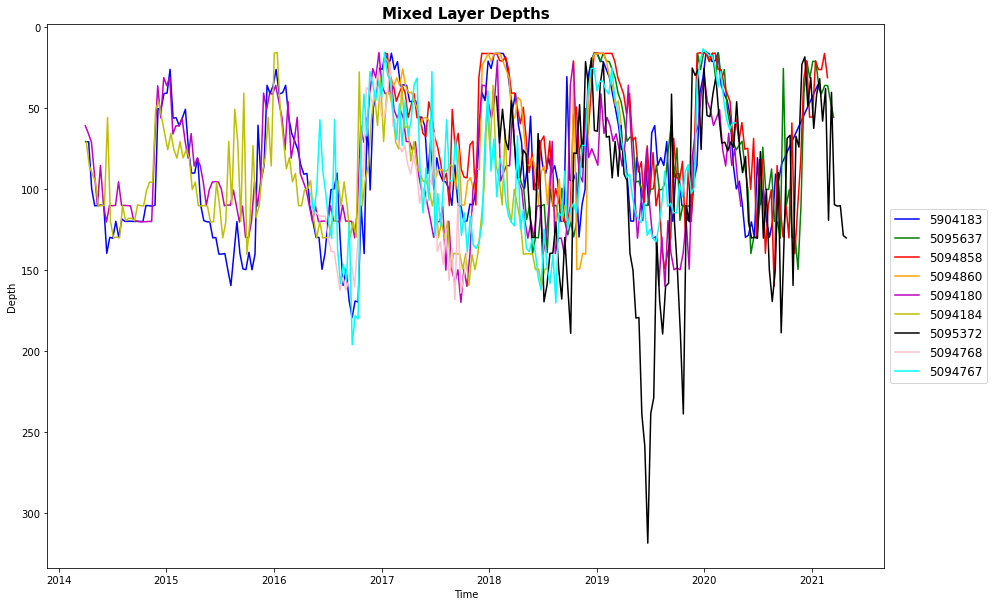

In [155]:
fig, ax = plt.subplots(figsize=(15,10))
clrs2=['b','g','r','orange','m','y', 'pink', 'cyan'];
floats2 = [f_4183, f_5637, f_4858, f_4860, f_4180, f_4184, f_4768, f_4767]

for fl in range(len(floats)):
    
    mld, imld, thickn = get_mld_rho(floats[fl])
    dates = floats[fl].JULD.values
    #dates = pd.to_datetime(dates).year

    #dayofyear = floats[fl].JULD.dt.dayofyear
    ax.plot(dates, mld, color = clrs[fl], label=float_names[fl])
plt.gca().invert_yaxis()
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large')

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.setp(leg_texts, fontsize='large')
plt.xlabel('Time')
plt.ylabel('Depth')
plt.title('Mixed Layer Depths', fontweight='bold', fontsize='15')
fig.show()
fig.savefig('/home/ac63/projects/hmei/figures/AllFloats_MLDs')


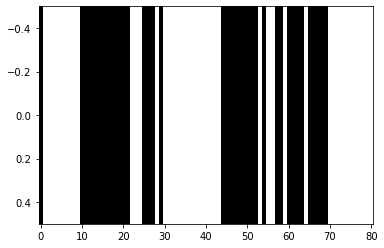

In [46]:
#Testing Ice Cover Plot
#floats[3].Depth.transpose().plot()
dates = floats[3].JULD.values
fl_depth = floats[3].Depth
profs = fl_depth.shape[0]
under_ice = np.empty((1, profs))
under_ice[:] = np.NaN
#under_ice = under_ice.flatten()
fl_depth = np.flip(fl_depth.values,1)
for p in range(len(under_ice[0])):
    if np.isnan(fl_depth[p][0:3]).all():
        under_ice[0][p] = True 
#plt.plot(dates, under_ice)
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(under_ice, aspect='auto', cmap=plt.cm.gray, interpolation='nearest')

# Average Seasonal Cycle of All Floats (check this)

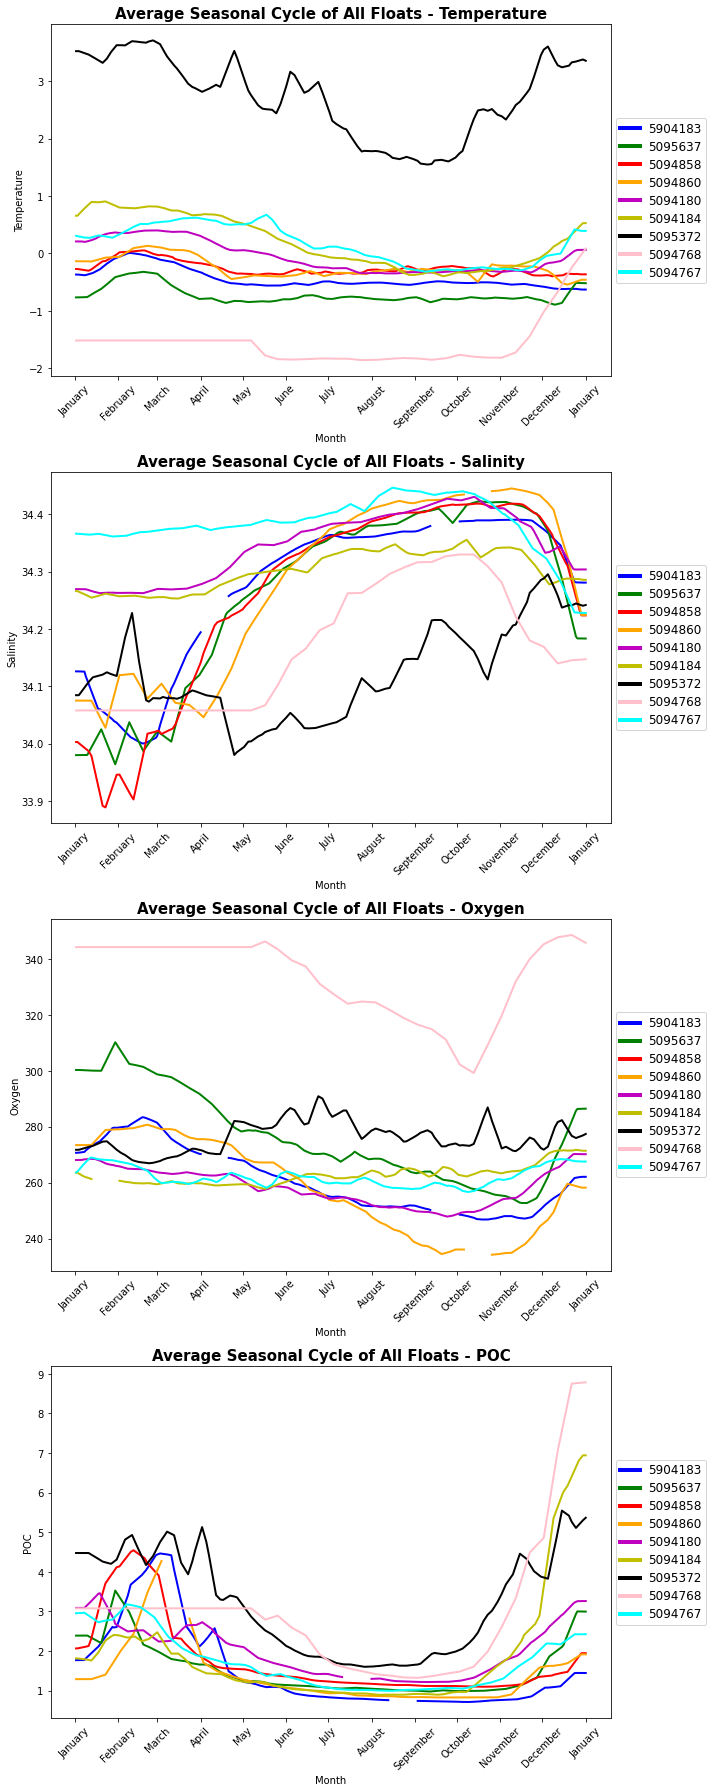

In [164]:
fig = plt.figure(figsize=(10,25))
yrs = range(2014, 2021)
var_functions = [set_temp_var, set_salinity_var, set_oxygen_var, set_POC_var]
variables = [temp, salinity, oxygen, POC]
varNames = ['Temperature', 'Salinity', 'Oxygen', 'POC']
clrs=['b','g','r','orange','m','y','k', 'pink', 'cyan'];

for var in range(len(var_functions)): 
    ax = fig.add_subplot(4,1,var + 1)

    for fl in range(len(floats)):
        variable = var_functions[var](floats[fl])
        #all_days = np.empty((1, 365))
        #all_days[:] = np.NaN
        all_days = np.arange(1,366)
        #all_days = all_days.flatten()
        
        #avg_all_floats = np.empty((1, 365))
        avg_all_floats = np.zeros(365)
        #avg_all_floats = avg_all_floats.flatten()
        count_years = np.zeros(365)

        dayofyear = floats[fl].JULD.dt.dayofyear
        dates = floats[fl].JULD.values
        dates = pd.to_datetime(dates).year
        yrs = range(min(dates), max(dates))
        for ii in range(len(yrs)): 
            in_year = dayofyear.values[dates==yrs[ii]]

            mld, imld, thickn = get_mld_rho(floats[fl])

            variable = np.flip(variable, 0)
            variable[variable==0] = np.nan
            avg_var = np.empty((1,np.size(variable, 1))).flatten()
            for i in range(len(imld)):
                #avg_temp[i] = np.nanmean(temp[0:int(imld[i]),i])
                avg_var[i] = np.nansum(variable[0:int(imld[i]),i]*thickn[0:int(imld[i]),i])/np.nansum(thickn[0:int(imld[i]),i])
            avg_var[avg_var==0] = np.nan
            
            avg_var_in_year = avg_var[dates==yrs[ii]]
            
            interp_avg_var_in_year = np.interp(all_days, in_year, avg_var_in_year)

            for num in range(len(all_days)):
                avg_all_floats[num] += interp_avg_var_in_year[num]
                #if not (interp_avg_var_in_year[num]==0) :
            #       all_days[in_year[num]-1] = in_year[num]-1
            #        count_years[in_year[num]-1] =  count_years[in_year[num]-1] + 1
            #print(all_days)
            #print(count_years)
        for day in range(len(avg_all_floats)):
            #if count_years[day] > 0: 
                avg_all_floats[day] = avg_all_floats[day]/len(yrs)
        mask = avg_all_floats==0
        #print(all_days)
        #print(avg_all_floats)
        nan_array = np.isnan(all_days)
        not_nan_array = ~ nan_array
        avg_all_floats = avg_all_floats[not_nan_array]
        all_days = all_days[not_nan_array]
        #print(all_days)
        #print(avg_all_floats)
        plt.plot(all_days, avg_all_floats, label = float_names[fl], color = clrs[fl], linewidth=2)
       
    date_form = DateFormatter("%B") # %m for month number
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    handles, labels = ax.get_legend_handles_labels()
    leg_lines = leg.get_lines()
    leg_texts = leg.get_texts()
    ax.set_xlabel('Month')
    ax.set_ylabel(str(varNames[var]))

    plt.setp(leg_lines, linewidth=4)
    plt.setp(leg_texts, fontsize='large')
    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees       
    plt.title('Average Seasonal Cycle of All Floats - ' + str(varNames[var]), fontweight='bold', fontsize='15')
    fig.tight_layout()

fig.savefig('/home/ac63/projects/hmei/figures/AllFloats_Average_Seasonal_Cycle')

